# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [2]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [1]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [2]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [3]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [7]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [9]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.7,99,1.0
1,2023-01-01T01:00,10.5,99,1.0
2,2023-01-01T02:00,10.4,98,0.1
3,2023-01-01T03:00,10.3,96,0.0
4,2023-01-01T04:00,9.7,95,0.0


In [11]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [13]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


C:\Users\Miranda\AppData\Local\Temp\ipykernel_3140\1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [15]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.371429,86.422619,0.142857
std,3.495063,12.799933,0.436037
min,0.400000,45.000000,0.000000
25%,5.900000,81.000000,0.000000
50%,8.250000,90.500000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


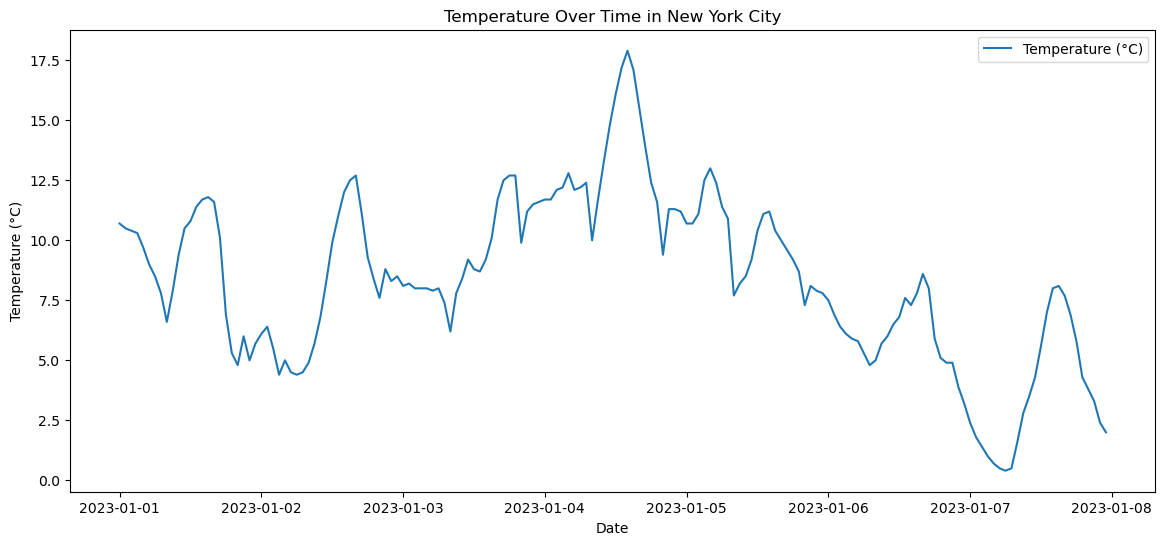

In [17]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

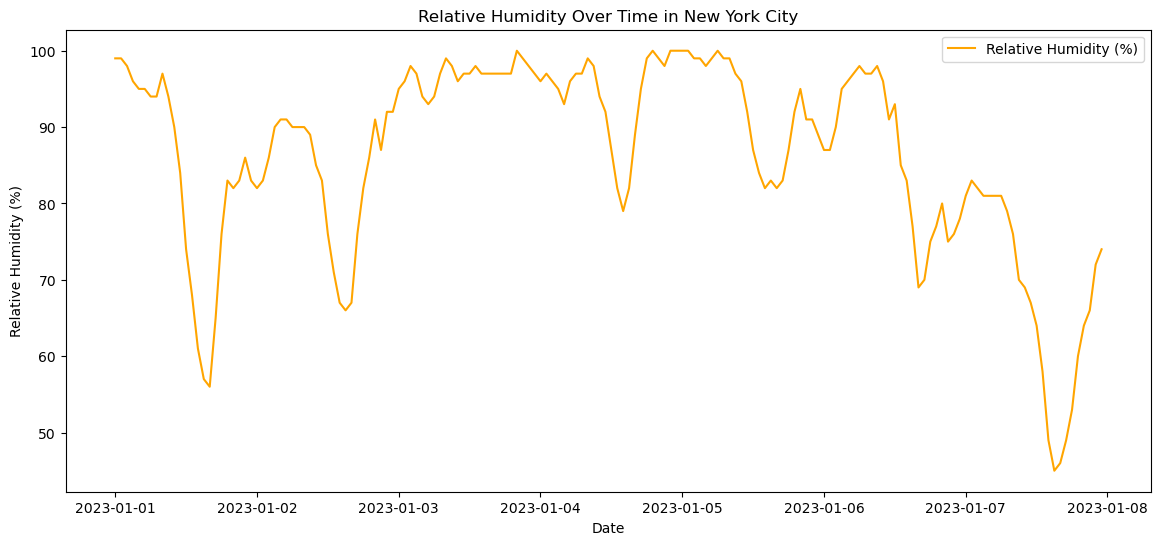

In [19]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


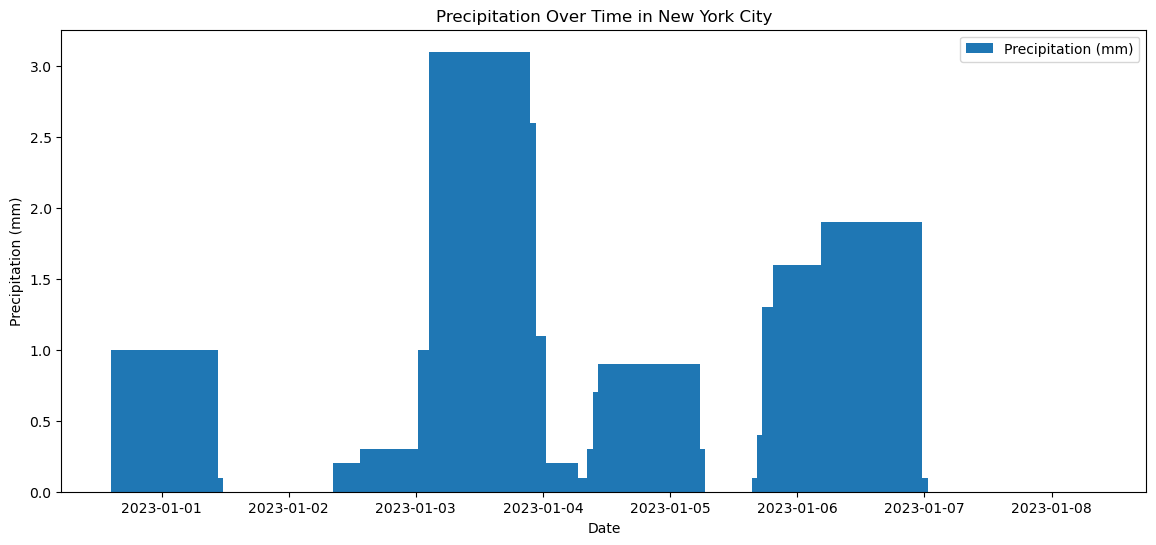

In [21]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [22]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.24


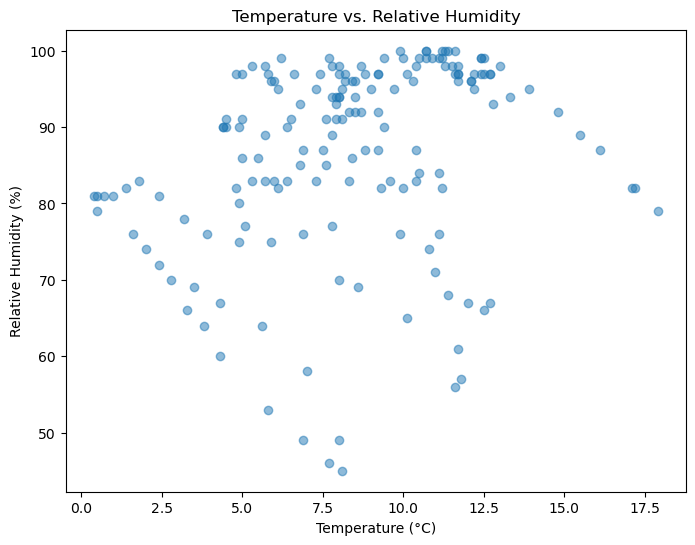

In [25]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [27]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.850000,83.708333,0.087500
2023-01-02,7.775000,83.458333,0.020833
2023-01-03,9.408333,96.875000,0.395833
2023-01-04,12.995833,94.166667,0.095833
2023-01-05,9.916667,92.666667,0.000000


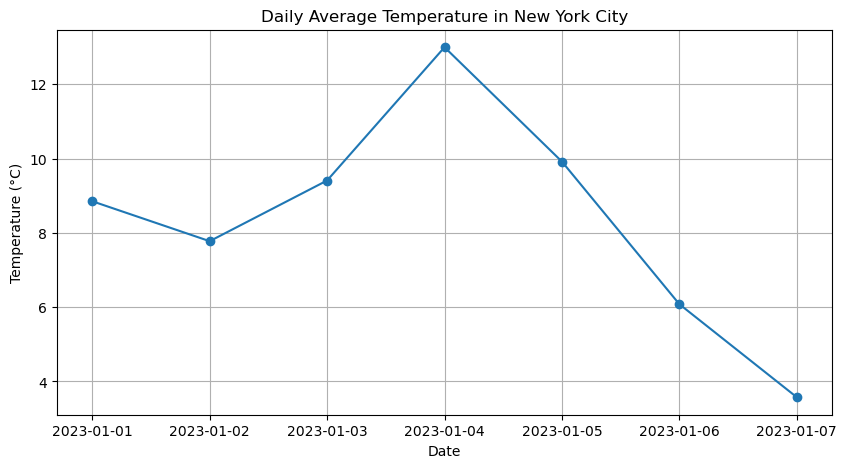

In [29]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [31]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.fillna(method='ffill', inplace=True)


C:\Users\Miranda\AppData\Local\Temp\ipykernel_3140\4259999984.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_la.fillna(method='ffill', inplace=True)


In [33]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [35]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


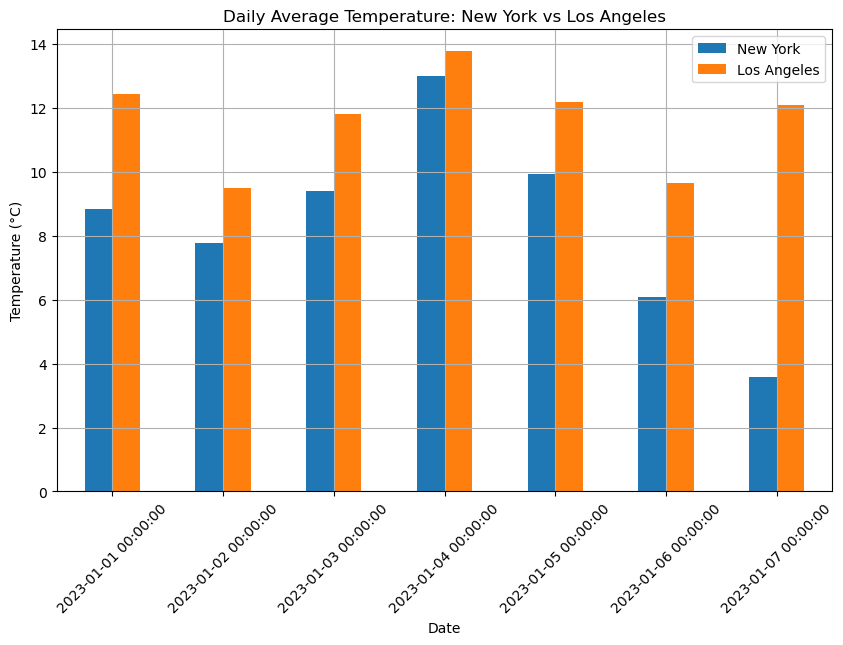

In [37]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [39]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.850000,12.433333,3.583333
2023-01-02,7.775000,9.483333,1.708333
2023-01-03,9.408333,11.808333,2.400000
2023-01-04,12.995833,13.766667,0.770833
2023-01-05,9.916667,12.183333,2.266667
2023-01-06,6.079167,9.662500,3.583333
2023-01-07,3.575000,12.095833,8.520833


In [41]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


In [43]:
lat_lon = 51.5074
long_lon = -0.1278
lat_sea = 47.6062
long_sea = -122.3321
start = '2023-01-01'
end = '2023-01-07'
var = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [53]:
base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': lat_lon,
    'longitude': long_lon,
    'start_date': start,
    'end_date': end,
    'hourly': ','.join(var),
    'timezone': 'Europe/London'
}

response = requests.get(base_url, params=params)


In [54]:

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')

Data fetched successfully!


In [57]:
data_2 = response.json()
hourly_data_2 = data_2['hourly']

df_2 = pd.DataFrame(hourly_data_2)
df_2.head()

,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,12.1,89,0.3
1,2023-01-01T01:00,11.3,94,0.1
2,2023-01-01T02:00,12.0,85,0.4
3,2023-01-01T03:00,11.1,80,0.0
4,2023-01-01T04:00,10.5,78,0.0


In [59]:
df_2['time'] = pd.to_datetime(df_2['time'])

In [61]:
df_2.head()

,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01 00:00:00,12.1,89,0.3
1,2023-01-01 01:00:00,11.3,94,0.1
2,2023-01-01 02:00:00,12.0,85,0.4
3,2023-01-01 03:00:00,11.1,80,0.0
4,2023-01-01 04:00:00,10.5,78,0.0


In [65]:
base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': lat_sea,
    'longitude': long_sea,
    'start_date': start,
    'end_date': end,
    'hourly': ','.join(var),
    'timezone': 'America/Los_Angeles'    #I didn't know that the timezone for Seattle was Los Angeles 
}

response = requests.get(base_url, params=params)


if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')

Data fetched successfully!


In [67]:
data_3 = response.json()
hourly_data_3 = data_3['hourly']

df_3 = pd.DataFrame(hourly_data_3)
df_3.head()

,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,3.1,95,0.0
1,2023-01-01T01:00,3.9,95,0.5
2,2023-01-01T02:00,3.5,98,0.0
3,2023-01-01T03:00,2.8,98,0.0
4,2023-01-01T04:00,2.6,98,0.0


In [69]:
df_3['time'] = pd.to_datetime(df_3['time'])

In [71]:
df_3.head()

,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01 00:00:00,3.1,95,0.0
1,2023-01-01 01:00:00,3.9,95,0.5
2,2023-01-01 02:00:00,3.5,98,0.0
3,2023-01-01 03:00:00,2.8,98,0.0
4,2023-01-01 04:00:00,2.6,98,0.0


In [77]:
df_2.columns

Index(['temperature_2m', 'relativehumidity_2m', 'precipitation'], dtype='object')

In [81]:
print(df_2.index.name)


time


In [79]:
df_3.columns

Index(['time', 'temperature_2m', 'relativehumidity_2m', 'precipitation'], dtype='object')

In [83]:
df_3.set_index('time', inplace=True)

In [85]:
print(df_3.index.name)  


time


The time is set to datetime and the index is also time! Looking good so far, time for visulization. 

In [88]:
resamp_lon = df_2.resample('D').mean()
resamp_sea = df_3.resample('D').mean()

Resampling the data for London and Seattle

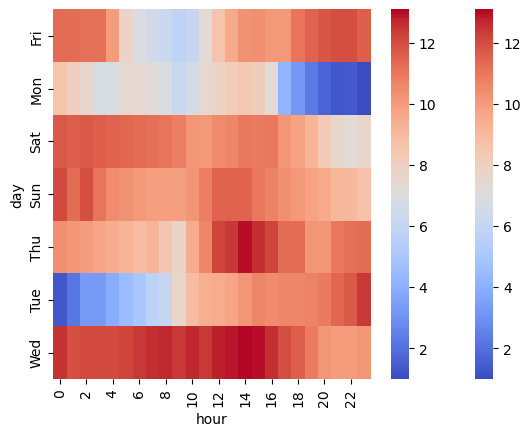

In [102]:
import seaborn as sns

df_2['day'] = df_2.index.strftime('%a')   
df_2['hour'] = df_2.index.hour
pivot = df_2.pivot_table(index='day', columns='hour', values='temperature_2m')
sns.heatmap(pivot, cmap='coolwarm')
plt.show()

Above is a heatmap of temperatures for the week. There seems to be cooler temps Monday night and into Tuesday. Wednesday has the highest and longest 'heat wave', spanning most of the day. I will repeat this for Seattle. 

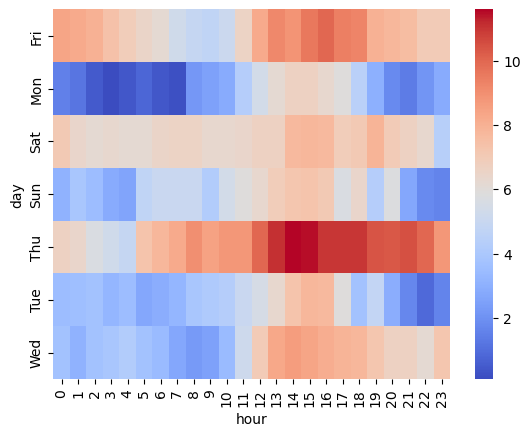

In [106]:
df_3['day'] = df_3.index.strftime('%a')   
df_3['hour'] = df_3.index.hour
pivot = df_3.pivot_table(index='day', columns='hour', values='temperature_2m')
sns.heatmap(pivot, cmap='coolwarm')
plt.show()

Seattle has a lot more vairation, probably due to it's rainy weather. We see a lot for clear highs and lows for the week. 

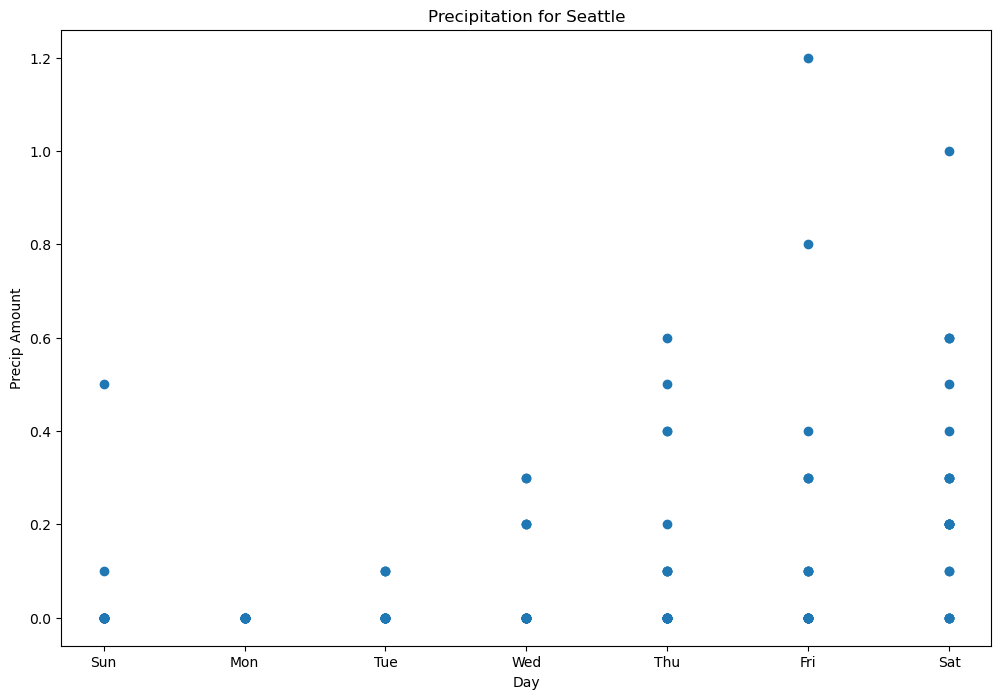

In [115]:
plt.figure(figsize=(12, 8))
plt.scatter(df_3['day'], df_3['precipitation']) 
plt.title('Precipitation for Seattle') 
plt.xlabel('Day') 
plt.ylabel('Precip Amount')
plt.show()

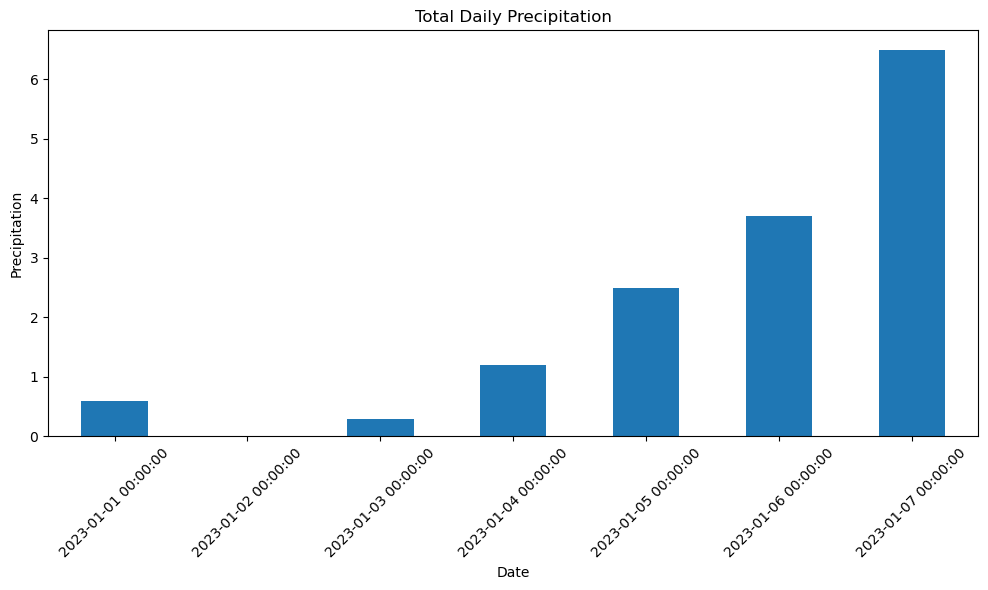

In [137]:
resamp_sea_precip = df_3['precipitation'].resample('D').sum()

plt.figure(figsize=(10, 6))
resamp_sea_precip.plot(kind='bar')
plt.title('Total Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here is bar chart of the aggregated precip amounts for each day. Monday there is no precipitation, which is interesting because it is also one of the coldest days. I think humidity will be higher on the days where there is more rain. Lets check that out next. 

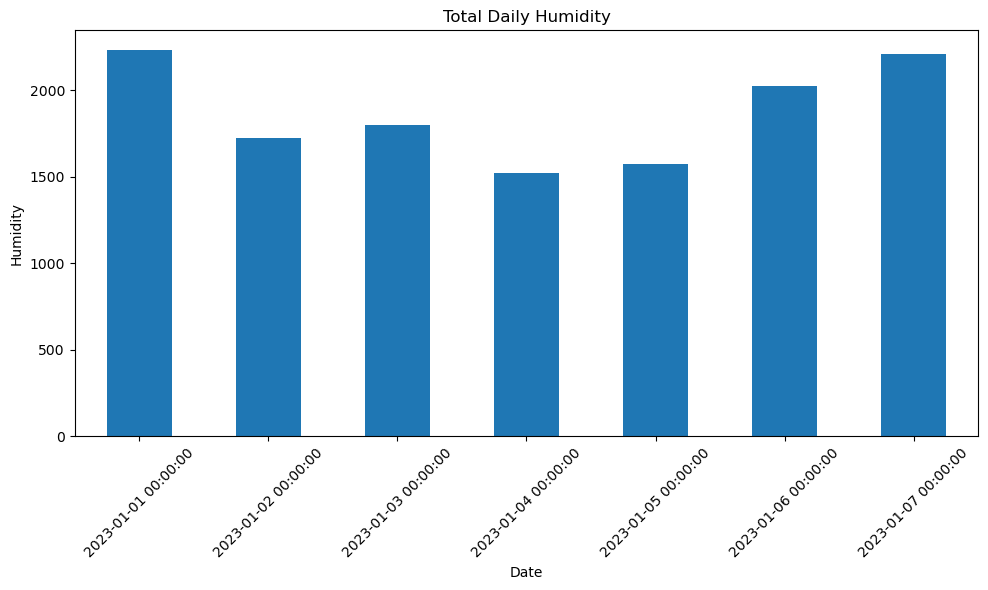

In [142]:
resamp_sea_hum = df_3['relativehumidity_2m'].resample('D').sum()

plt.figure(figsize=(10, 6))
resamp_sea_hum.plot(kind='bar')
plt.title('Total Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

I repeated the same graph type here, so we can see average humidity levels for Seattle. It remains pretty high throughout the week, with a slight dip on Wednesday. This makes sense because there was less rain on Monday and Tuesday. 

Let's look at London with Seattle to see how they compare. 

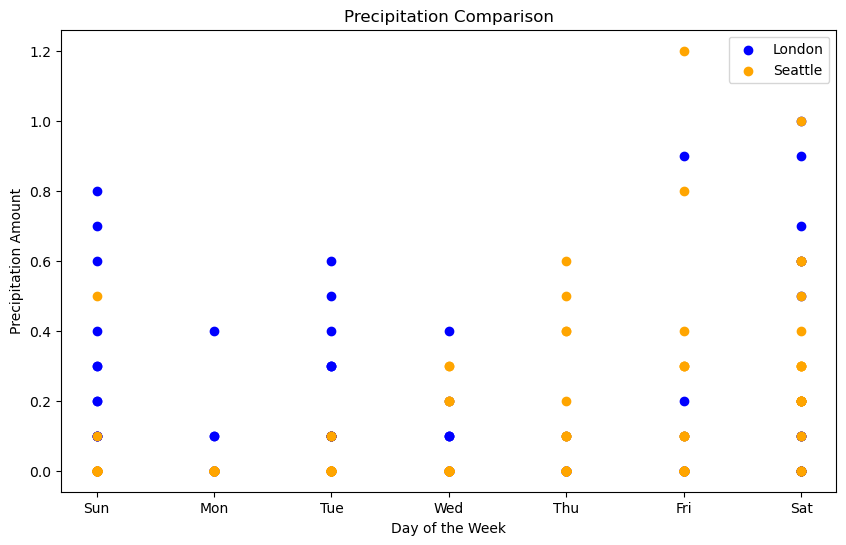

In [152]:
plt.figure(figsize=(10, 6))
plt.scatter(df_2['day'], df_2['precipitation'], label='London', color='blue')
plt.scatter(df_3['day'], df_3['precipitation'], label='Seattle', color='orange')
plt.xlabel('Day of the Week')
plt.ylabel('Precipitation Amount')
plt.title('Precipitation Comparison')
plt.legend()
plt.show()

London has higher precipitation amounts and longer, higher temperatures. 

In [173]:
combined_precip = pd.DataFrame({
    'London': resamp_lon['temperature_2m'],
    'Seattle': resamp_sea['temperature_2m']
})

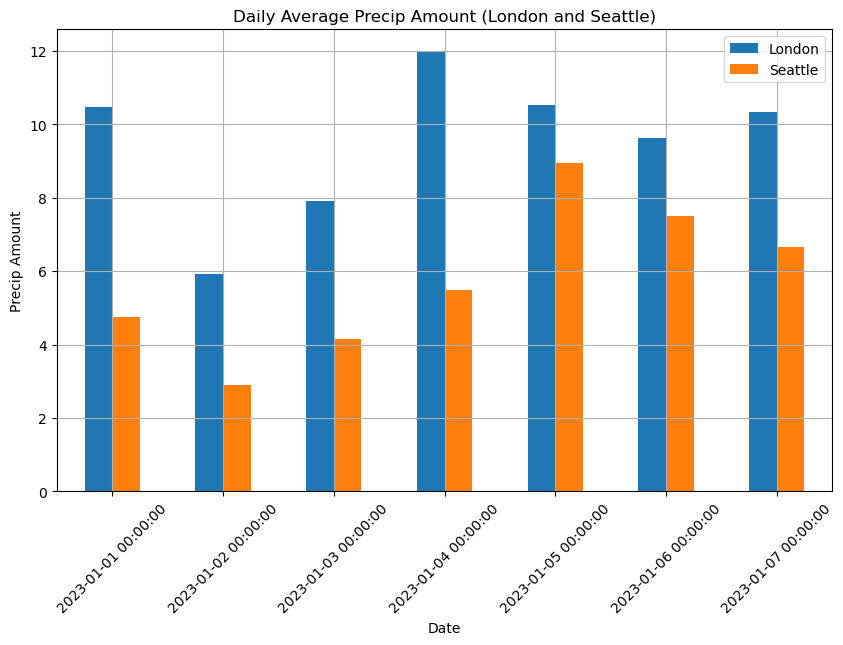

In [177]:
combined_precip.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Precip Amount (London and Seattle)')
plt.xlabel('Date')
plt.ylabel('Precip Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


London has higher precipitation that Seattle!